In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Take-1_-How-well-do-you-know-Cars_-Responsesrough-clean.csv')

In [3]:
len(df)

792

In [4]:
df.columns

Index(['Timestamp', 'What is your gender identity?', 'You are a...',
       'Your age?',
       'Have you ever visited a mechanic? If yes, then what for? ',
       '1. Describe the object below:', '2. Describe the object below:',
       '3. Describe the object below:', '4. Describe the object below:',
       '5. Describe the object below:',
       '1. Describe the object in the yellow box', '2. Describe the object',
       '3. Describe the object labelled 3:',
       '4. Describe the object labelled 4:', '5.Describe the object',
       '6. Describe the object circled:', '7. Describe the object:',
       '8. Describe the object:', '9. Describe the object in the yellow box:',
       '10. Describe the object labelled 10:'],
      dtype='object')

In [5]:
mapping = {df.columns[1]: 'Gender', df.columns[2]: 'Expertise', df.columns[3]: 'Age',
          df.columns[4]: 'Visited_Mech', df.columns[5]: 'Q1', df.columns[6]: 'Q2', 
          df.columns[7]: 'Q3', df.columns[8]: 'Q4', df.columns[9]: 'Q5', df.columns[10]: 'Q6',
          df.columns[11]: 'Q7', df.columns[12]: 'Q8', df.columns[13]: 'Q9', df.columns[14]: 'Q10',
          df.columns[15]: 'Q11', df.columns[16]: 'Q12', df.columns[17]: 'Q13', df.columns[18]: 'Q14',
          df.columns[19]: 'Q15'}
df.rename(columns=mapping, inplace=True)

In [52]:
df = df.dropna()
df.head()

,Timestamp,Gender,Expertise,Age,Visited_Mech,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
3,6-28-2022 17:53:02,Male,car expert,18-20,"yes, busted engine",an obese plate,a crowbar with a mouth,a nut-bolt…cmon i’m not stupid,a more round nut-bolt,something to lift the car with,the thing that make the car go vroom vroom,gear box,something for the car’s brakes,a pipe bro,a thiccer pipe bro,THE THICCEST PIPE BOI,exhaust,brakes,suspension boink,luggage idk
4,6-28-2022 18:03:15,Male,non-expert,21-30,No,Spare wheel,"It is like a spatula, something you can use to...",Nut,An extended nut,Non hydraulic jack,Looks like that could be the engine,Battery,Oil container,Pipe to transport oil,Exhaust,Exhaust,Exhaust,Something u put the tyre in,Spring,Back of the car
5,6-28-2022 18:03:21,Female,non-expert,21-30,nope :’),a wheel or tire of a car that is stuck in a sink,cuticle pushers,ooh bolts?,a different type of bolt,the thingy that hikes your car up to change a ...,engine¿,a box that can start up your car (jumpstart?),genuinely no clue,exhaust,car water bottle,THE THING THAT SPEWS GAS FUMES,also a thing that spews gas fumes,rim with a 3 attached to it,allows for car to go over bumps,extra tire
6,6-28-2022 19:35:44,Female,non-expert,21-30,Nope,Circular piece of black rubber surrounding a s...,Long hockey stick shaped pieces of metal with ...,Hexagonal pieces of metal with a hole in the m...,Like the last one but has a circular compensat...,"Metal lifter of cars, helpful when changing a ...",Large cube piece of equipment which converts e...,Smaller but surprisingly very heavy cube of eq...,Thing that turns the axle which in turn spins ...,Metal rod connecting to the middle of the tire...,Rusty piece of metal that looks like it’s a tu...,Allows combustion to exit safely (muffler) met...,Oh ok this is also a muffler (?)/ part that co...,Probably what connects the axle to the tire. I...,Red heavy duty spring spring. Allows to for th...,Yellow briefcase for important business if one...
7,6-28-2022 19:57:48,Female,non-expert,21-30,no,Oreo without the upper O,Metal leech,Screw cap,Vacuum flask liner,Ground jack(when you rotate the handle it goes...,Iron man’s suit without colour painted,Computer host with a handle and a red oil gun,Biceps brachii (something drives the tire(hand...,Forearm,Don’t even know if it’s actually a thing but i...,Telescopic eraser,Tube pasta,Wheel pizza cutter with a hard-to-handle handle,Buffer spring,Suitcase


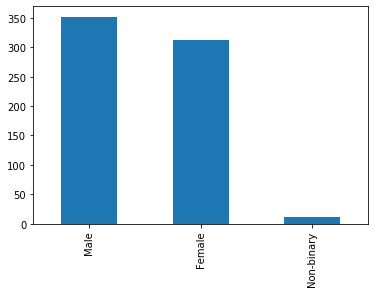

In [53]:
df['Gender'].value_counts().plot(kind='bar')

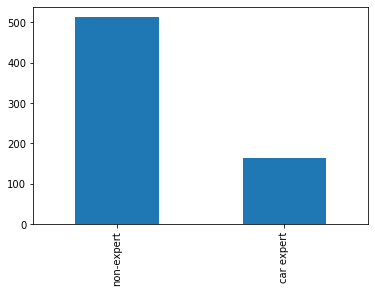

In [54]:
df['Expertise'].value_counts().plot(kind='bar')

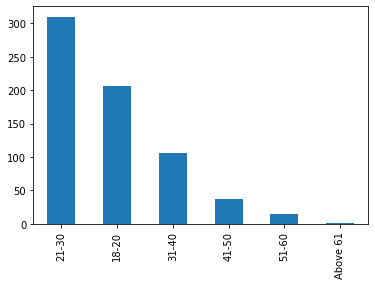

In [55]:
df['Age'].value_counts().plot(kind='bar')

In [56]:
df['Q1']

3                                         an obese plate
4                                            Spare wheel
5       a wheel or tire of a car that is stuck in a sink
6      Circular piece of black rubber surrounding a s...
7                               Oreo without the upper O
                             ...                        
787                                                 tire
788                         A car ride in a kitchen sink
789                                          Spare tire 
790    This is an extra tire that you often keep in a...
791                                           bonus tire
Name: Q1, Length: 676, dtype: object

In [81]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r'\w+')

stop_words = set(stopwords.words('english'))
more_stop_words = ['think', 'probably', 'maybe', 'ignorant', 'sure', 'usually', 'none',         
                   'need', 'called', 'look', 'looked', 'honestly', 'idk', 'appear', 'looks']
stop_words.update(more_stop_words)

def clean_sentences(column):
    '''
    input:
        column - a column in the dataframe containing sentence responses
    output:
        string containing all the relevant words of the column    
    '''
    tokens_list = []
    for sentence in column:
        tokens = tokenizer.tokenize(sentence)
        tokens_list.append(tokens)
        
    words = []
    for sentence in tokens_list:
        for word in sentence:
            if word.lower() not in stop_words:
                words.append(word.lower())
    
    return " ".join(words)

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(string_of_words):
    wordcloud = WordCloud(width = 800, height = 800,
                          prefer_horizontal=True, 
                          collocations=False, 
                          background_color ='white',
                          min_font_size = 10).generate(string_of_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

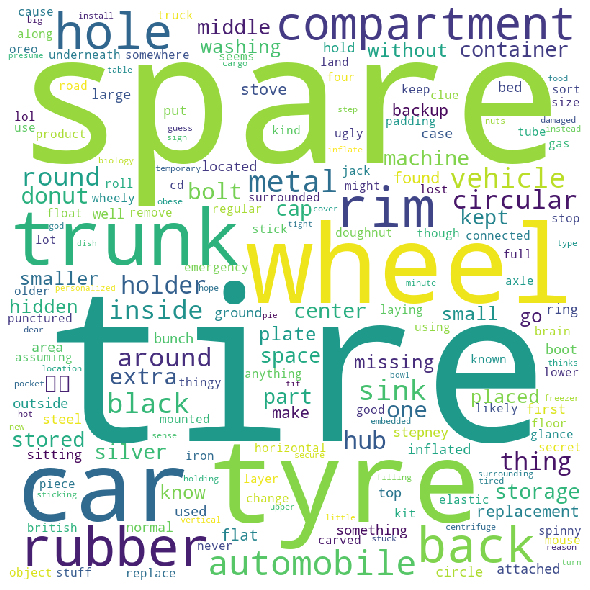

In [82]:
plot_wordcloud(clean_sentences(df['Q1']))

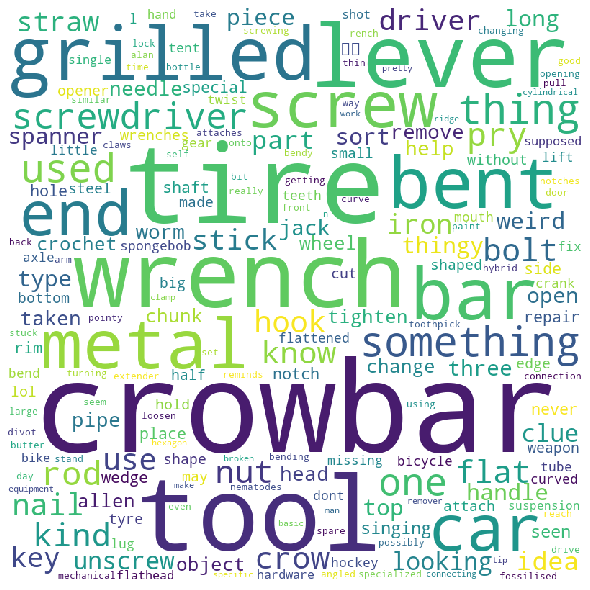

In [83]:
plot_wordcloud(clean_sentences(df['Q2']))

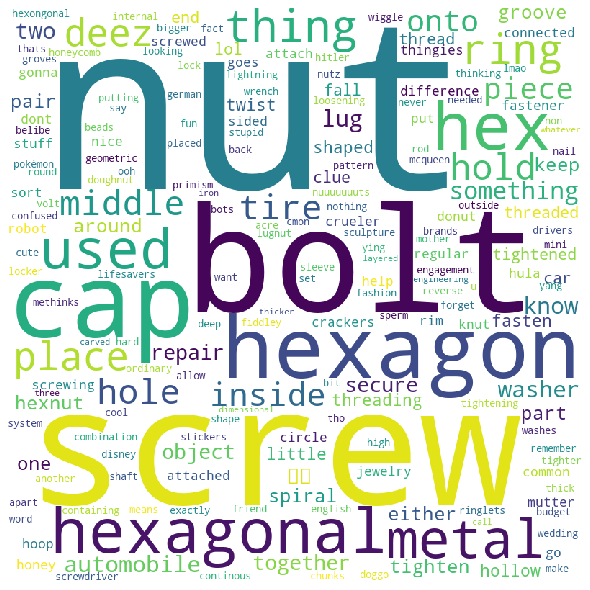

In [84]:
plot_wordcloud(clean_sentences(df['Q3']))

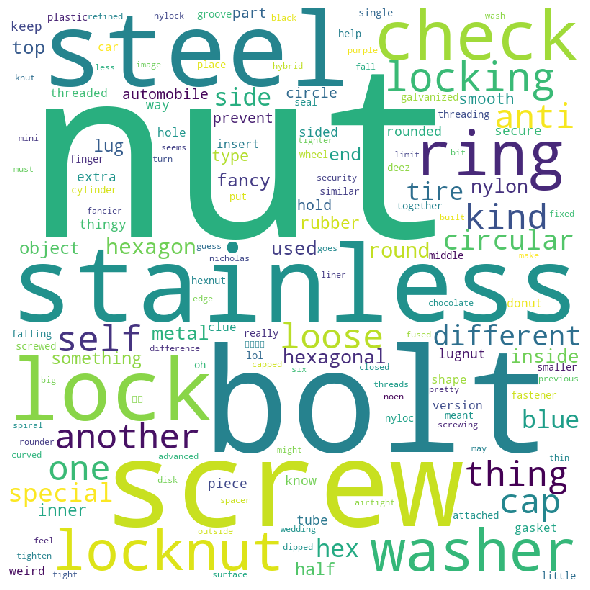

In [85]:
plot_wordcloud(clean_sentences(df['Q4']))

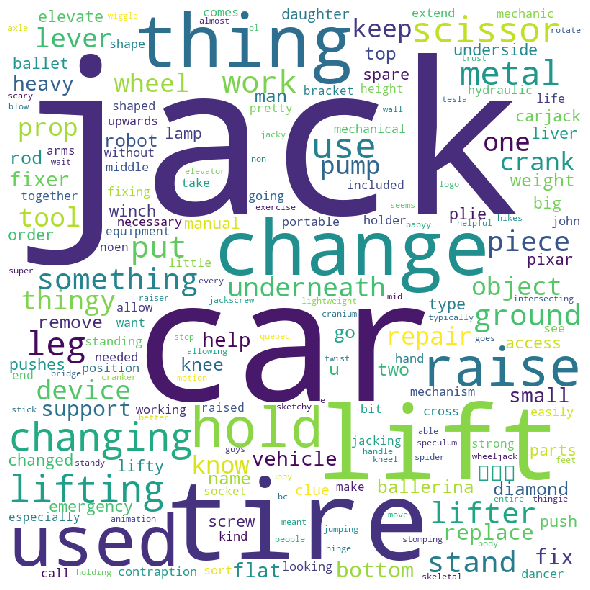

In [86]:
plot_wordcloud(clean_sentences(df['Q5']))

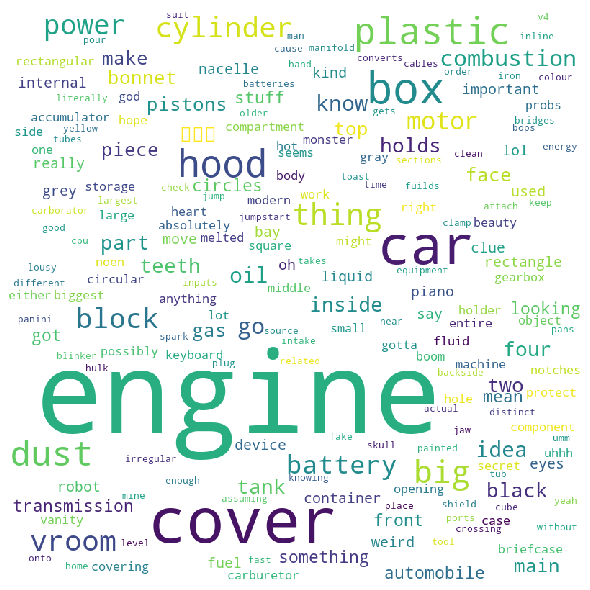

In [87]:
plot_wordcloud(clean_sentences(df['Q6']))

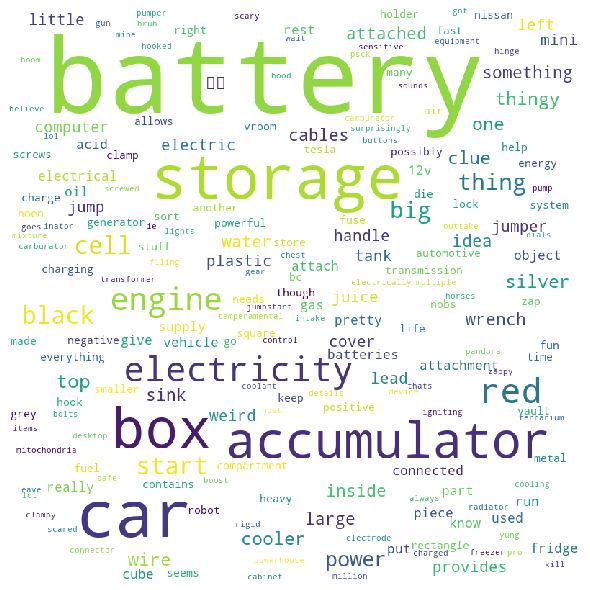

In [88]:
plot_wordcloud(clean_sentences(df['Q7']))

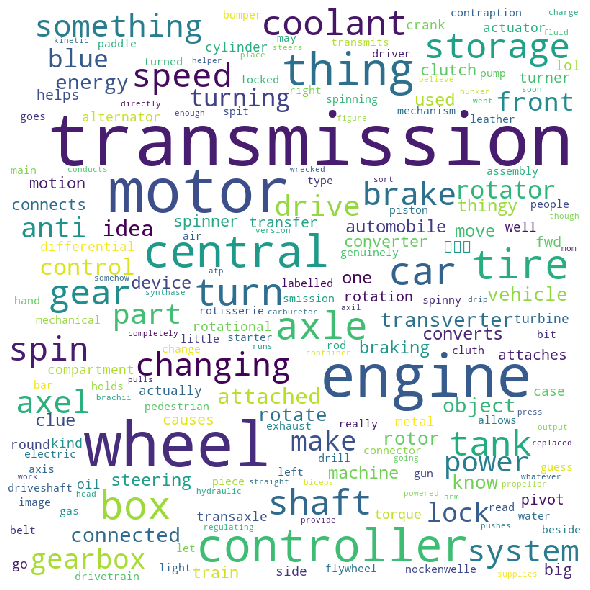

In [89]:
plot_wordcloud(clean_sentences(df['Q8']))

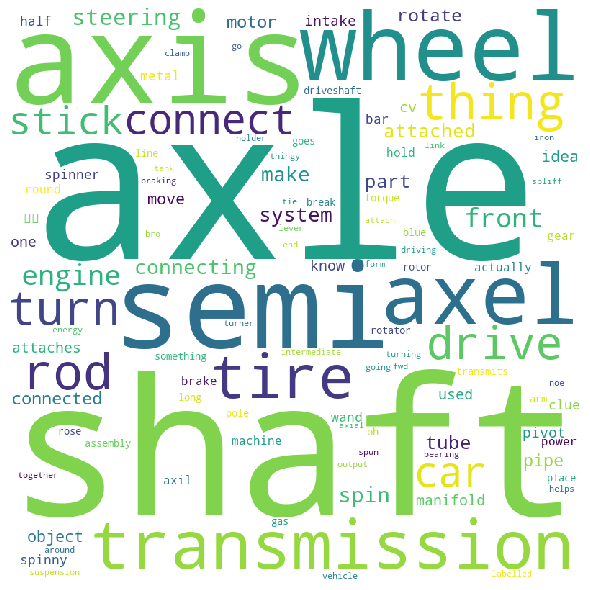

In [90]:
plot_wordcloud(clean_sentences(df['Q9']))

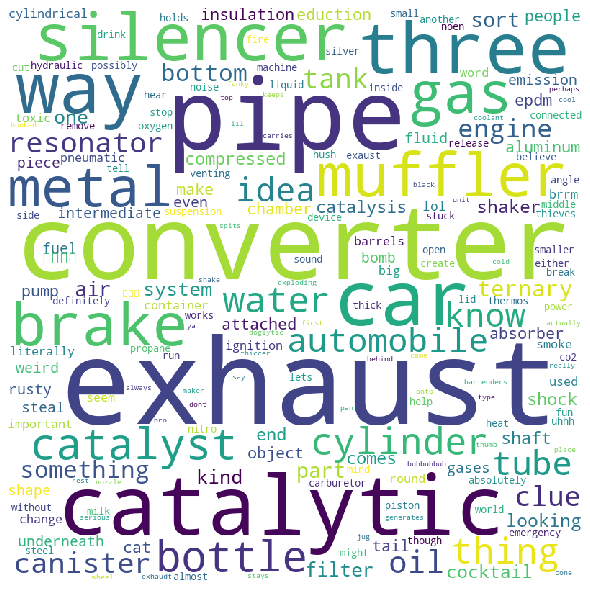

In [91]:
plot_wordcloud(clean_sentences(df['Q10']))

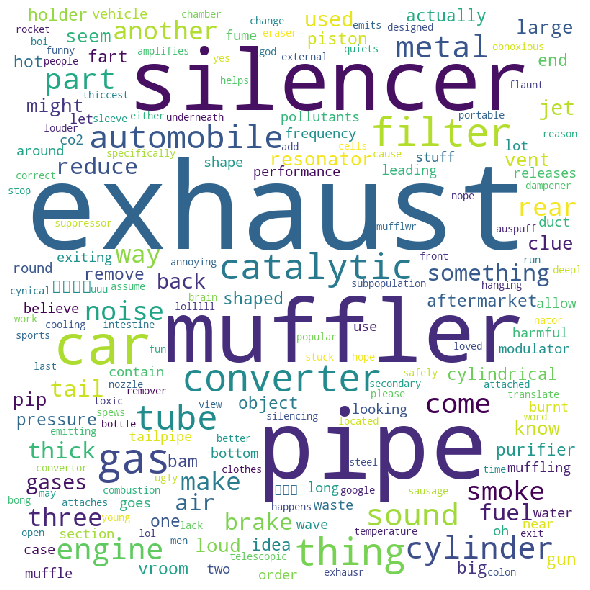

In [92]:
plot_wordcloud(clean_sentences(df['Q11']))

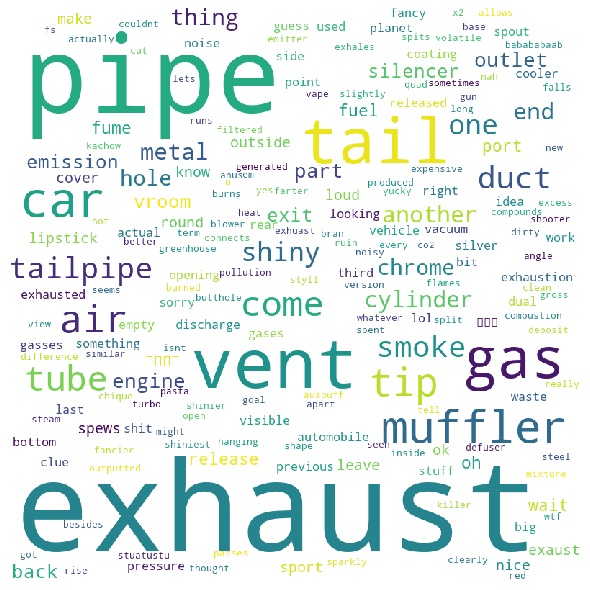

In [93]:
plot_wordcloud(clean_sentences(df['Q12']))

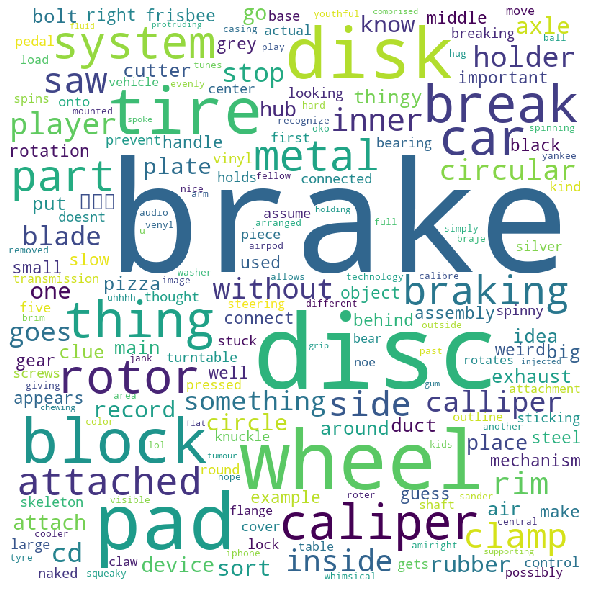

In [94]:
plot_wordcloud(clean_sentences(df['Q13']))

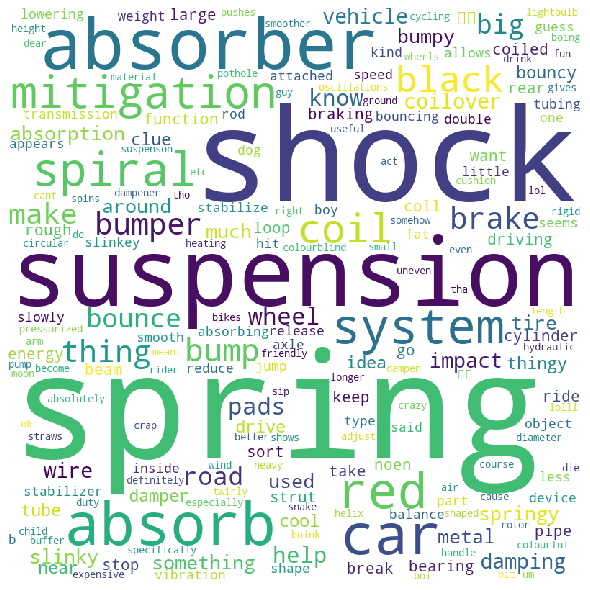

In [95]:
plot_wordcloud(clean_sentences(df['Q14']))

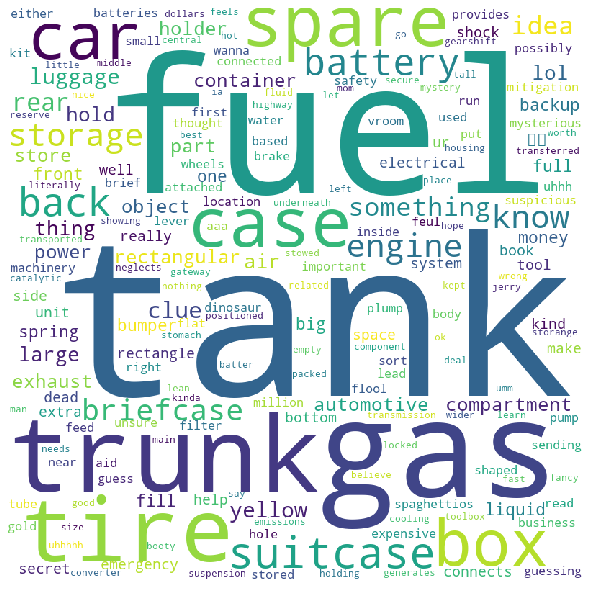

In [96]:
plot_wordcloud(clean_sentences(df['Q15']))